# Семинар 2. Обработка данных.

$$\text{More data beats clever algorithms, but better data beats more data (Р. Norvig)}$$

Обработка данных - это подготовка набора данных перед загрузкой в модель. Данные в исходном виде часто содержат артефакты, такие как шум, пропуски или дубликаты, которые усложняют их анализ и снижают качество работы алгоритмов. 

## Чтение данных и первичная обработка

Описание данных:

- `Price`: цена
- `SqFt`: квадратный фут
- `Bedrooms`: #спален
- `Bathrooms`: #ванных комнат
- `Offers`: #предложений
- `Brick`: кирпичная постройка
- `Neighborhood`: район
- `Date`: дата 

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("src/house-prices.csv", index_col="Home")
df

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood,Date
Home,,,,,,,,
1,114300.0,1790.0,2.0,2.0,2.0,No,East,2014-11-16
2,114200.0,2030.0,4.0,2.0,3.0,No,East,2014-07-14
3,114800.0,1740.0,3.0,2.0,1.0,No,East,2014-09-22
4,94700.0,1980.0,3.0,2.0,3.0,No,East,2013-07-12
5,119800.0,2130.0,3.0,3.0,3.0,No,East,2013-12-26
...,...,...,...,...,...,...,...,...
130,NaN,NaN,NaN,NaN,NaN,Yes,North,2014-08-13
131,119700.0,1900.0,3.0,3.0,3.0,Yes,East,2013-06-24
132,147900.0,2160.0,4.0,3.0,3.0,Yes,East,2014-07-09


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 134 entries, 1 to 134
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         133 non-null    float64
 1   SqFt          133 non-null    float64
 2   Bedrooms      132 non-null    float64
 3   Bathrooms     133 non-null    float64
 4   Offers        133 non-null    float64
 5   Brick         134 non-null    object 
 6   Neighborhood  134 non-null    object 
 7   Date          134 non-null    object 
dtypes: float64(5), object(3)
memory usage: 9.4+ KB


In [4]:
df.describe()

,Price,SqFt,Bedrooms,Bathrooms,Offers
count,133.000000,133.000000,132.000000,133.000000,133.000000
mean,130497.195489,2002.030075,3.022727,2.451128,2.563910
std,26510.525966,208.263962,0.725394,0.514431,1.061398
min,69100.000000,1450.000000,2.000000,2.000000,1.000000
25%,111600.000000,1890.000000,3.000000,2.000000,2.000000
50%,126200.000000,2000.000000,3.000000,2.000000,3.000000
75%,147900.000000,2140.000000,3.000000,3.000000,3.000000
max,211200.000000,2590.000000,5.000000,4.000000,6.000000


### Пропуски

In [5]:
df.isnull().values.any()

np.True_

- стратегии работы с пропусками
    - [удаление соответсвующих строк/столбцов](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html) 
    - [фиксированное значение:  $\ 0 \ / \ 1 \ / -1 \ / ...$](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html#pandas.DataFrame.fillna)
    - некоторая статистика: среднее значение/медиана/...

In [6]:
df.isna().sum()

Price           1
SqFt            1
Bedrooms        2
Bathrooms       1
Offers          1
Brick           0
Neighborhood    0
Date            0
dtype: int64

In [7]:
df[df.isna().any(axis=1)]

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood,Date
Home,,,,,,,,
129,130427.0,2000.0,NaN,2.0,2.0,No,North,2014-05-04
130,NaN,NaN,NaN,NaN,NaN,Yes,North,2014-08-13


In [8]:
df.dropna(subset=['Price'], inplace=True)

In [9]:
df

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood,Date
Home,,,,,,,,
1,114300.0,1790.0,2.0,2.0,2.0,No,East,2014-11-16
2,114200.0,2030.0,4.0,2.0,3.0,No,East,2014-07-14
3,114800.0,1740.0,3.0,2.0,1.0,No,East,2014-09-22
4,94700.0,1980.0,3.0,2.0,3.0,No,East,2013-07-12
5,119800.0,2130.0,3.0,3.0,3.0,No,East,2013-12-26
...,...,...,...,...,...,...,...,...
129,130427.0,2000.0,NaN,2.0,2.0,No,North,2014-05-04
131,119700.0,1900.0,3.0,3.0,3.0,Yes,East,2013-06-24
132,147900.0,2160.0,4.0,3.0,3.0,Yes,East,2014-07-09


In [10]:
df.fillna(df['Bedrooms'].median(), inplace=True)
df

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood,Date
Home,,,,,,,,
1,114300.0,1790.0,2.0,2.0,2.0,No,East,2014-11-16
2,114200.0,2030.0,4.0,2.0,3.0,No,East,2014-07-14
3,114800.0,1740.0,3.0,2.0,1.0,No,East,2014-09-22
4,94700.0,1980.0,3.0,2.0,3.0,No,East,2013-07-12
5,119800.0,2130.0,3.0,3.0,3.0,No,East,2013-12-26
...,...,...,...,...,...,...,...,...
129,130427.0,2000.0,3.0,2.0,2.0,No,North,2014-05-04
131,119700.0,1900.0,3.0,3.0,3.0,Yes,East,2013-06-24
132,147900.0,2160.0,4.0,3.0,3.0,Yes,East,2014-07-09


### Дубликаты

In [11]:
df.duplicated().sum()

np.int64(4)

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood,Date
Home,,,,,,,,
1,114300.0,1790.0,2.0,2.0,2.0,No,East,2014-11-16
2,114200.0,2030.0,4.0,2.0,3.0,No,East,2014-07-14
3,114800.0,1740.0,3.0,2.0,1.0,No,East,2014-09-22
4,94700.0,1980.0,3.0,2.0,3.0,No,East,2013-07-12
5,119800.0,2130.0,3.0,3.0,3.0,No,East,2013-12-26
...,...,...,...,...,...,...,...,...
125,147900.0,2160.0,4.0,3.0,3.0,Yes,East,2014-07-09
126,113500.0,2070.0,2.0,2.0,2.0,No,North,2014-01-07
127,149900.0,2020.0,3.0,3.0,1.0,No,West,2013-07-04


### Визуализация

Основные инструменты для визуализации данных:
 - [matplotlib](https://matplotlib.org/stable/users/getting_started/)
    - очень простая и понятная, позволяет быстро строить графики "на коленке"
    - не очень красивые визуализации
 - [seaborn](https://seaborn.pydata.org/tutorial.html)
    + для работы придется плотнее познакомиться с документацией
    + визуализации будут симпатичнее

[matplotlib.pyplot.hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) vs. [seaborn.histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html)

(array([ 3.,  7., 24., 30., 19., 24., 11.,  6.,  3.,  2.]),
 array([ 69100.,  83310.,  97520., 111730., 125940., 140150., 154360.,
        168570., 182780., 196990., 211200.]),
 <BarContainer object of 10 artists>)

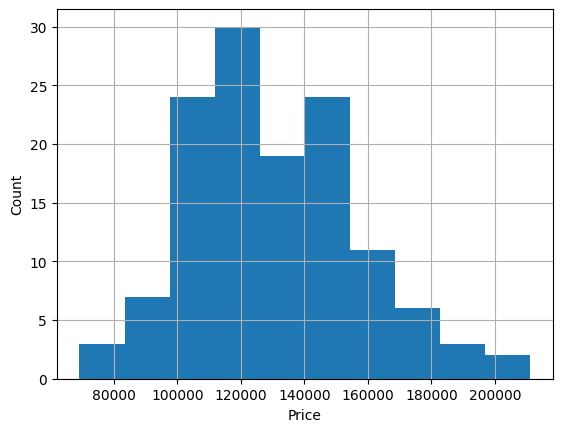

In [14]:
import matplotlib.pyplot as plt

plt.xlabel('Price')
plt.ylabel('Count')
plt.grid()
plt.hist(df['Price'])

- KDE - [kernel density estimation](https://ru.wikipedia.org/wiki/%D0%AF%D0%B4%D0%B5%D1%80%D0%BD%D0%B0%D1%8F_%D0%BE%D1%86%D0%B5%D0%BD%D0%BA%D0%B0_%D0%BF%D0%BB%D0%BE%D1%82%D0%BD%D0%BE%D1%81%D1%82%D0%B8) (ядерная оценка плотности)

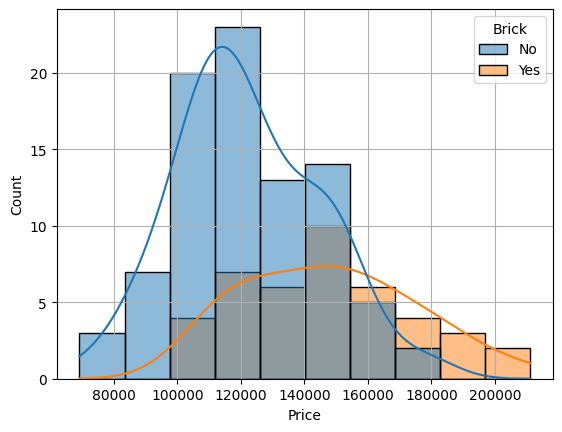

In [15]:
import seaborn as sns

sns.histplot(df, x='Price', kde=True, hue='Brick')
plt.grid()

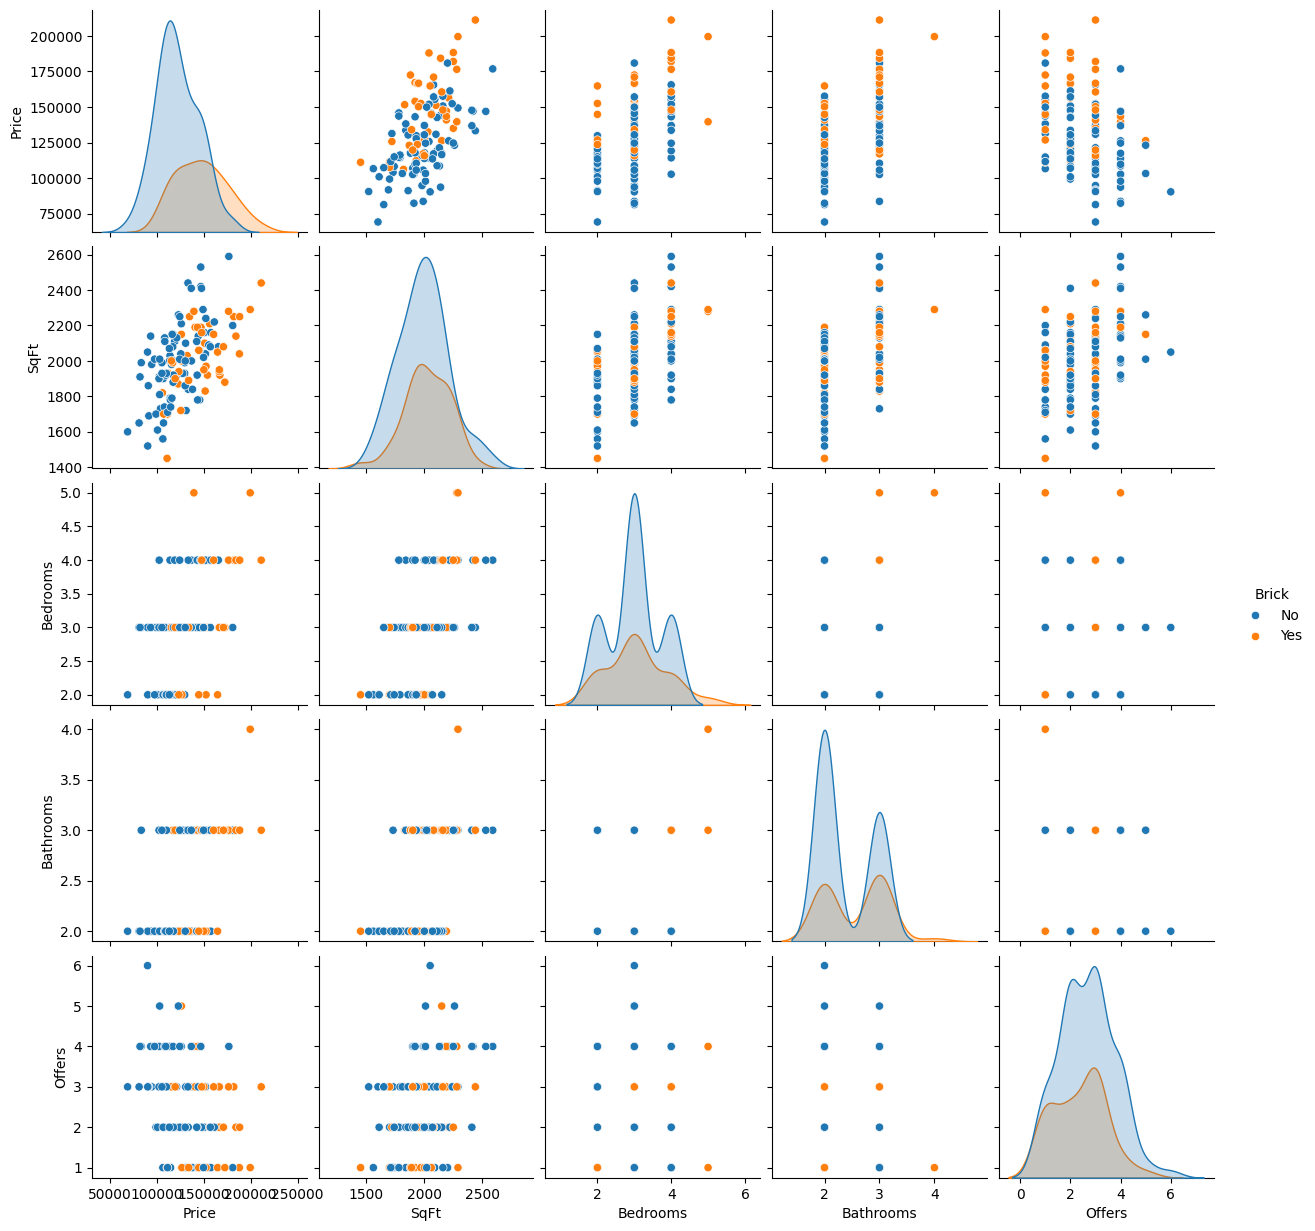

In [16]:
sns.pairplot(df, hue='Brick')

<Axes: xlabel='SqFt', ylabel='Price'>

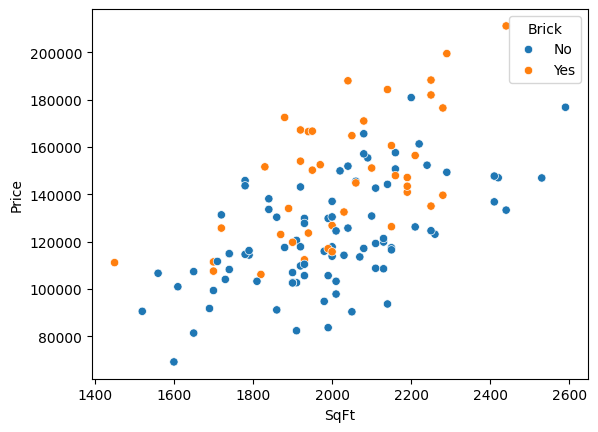

In [17]:
sns.scatterplot(data=df, x='SqFt', y='Price', hue='Brick')

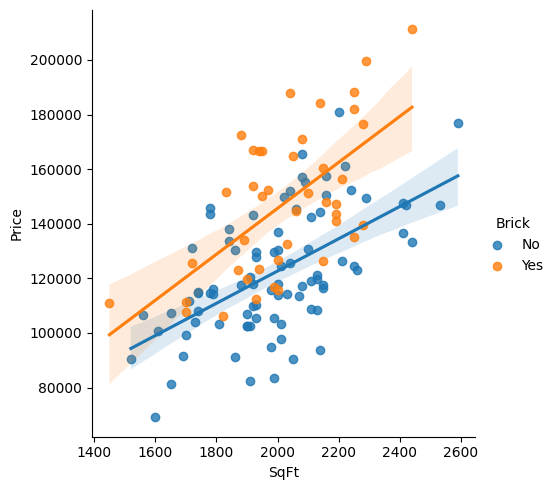

In [18]:
sns.lmplot(data=df, x='SqFt', y='Price', hue='Brick')

- [Boxplot ("Ящик с усами")](https://ru.wikipedia.org/wiki/%D0%AF%D1%89%D0%B8%D0%BA_%D1%81_%D1%83%D1%81%D0%B0%D0%BC%D0%B8) - график, использующийся в **прикладной статистике**, компактно изображающий одномерное распределение вероятностей.

- Границами ящика служат первый и третий квартили (25-й и 75-й процентили соответственно), линия в середине ящика — медиана (50-й процентиль). Концы усов — края статистически значимой выборки (без выбросов), и они могут определяться несколькими способами. Наиболее распространённые значения, определяющие длину «усов»:

  - Минимальное и максимальное наблюдаемые значения данных по выборке (в этом случае выбросы отсутствуют);
  - Разность первого квартиля и полутора межквартильных расстояний; сумма третьего квартиля и полутора межквартильных расстояний (в этом случае присутствуют выбросы). В общем виде эта формула имеет вид
  
    $$X_1 = Q_1 - k(Q_3 - Q_1), \ \ \   X_2 = Q_3 + k(Q_3 - Q_1)$$

  - где $X_1$ — нижняя граница уса, $X_2$ — верхняя граница уса, $Q_1$ — первый квартиль, $Q_3$ — третий квартиль, $k$ — коэффициент, наиболее часто употребляемое значение которого равно $1.5$. При этом длину верхнего уса ограничиваем максимальным значением по выборке, попадающим в верхнюю границу уса; длину нижнего уса ограничиваем минимальным значением по выборке, попадающим в длину нижнего уса. Поэтому длина верхнего и нижнего уса может не совпадать.

<img src="src/Boxplot_vs_PDF.png" width="650px">

<Axes: ylabel='Offers'>

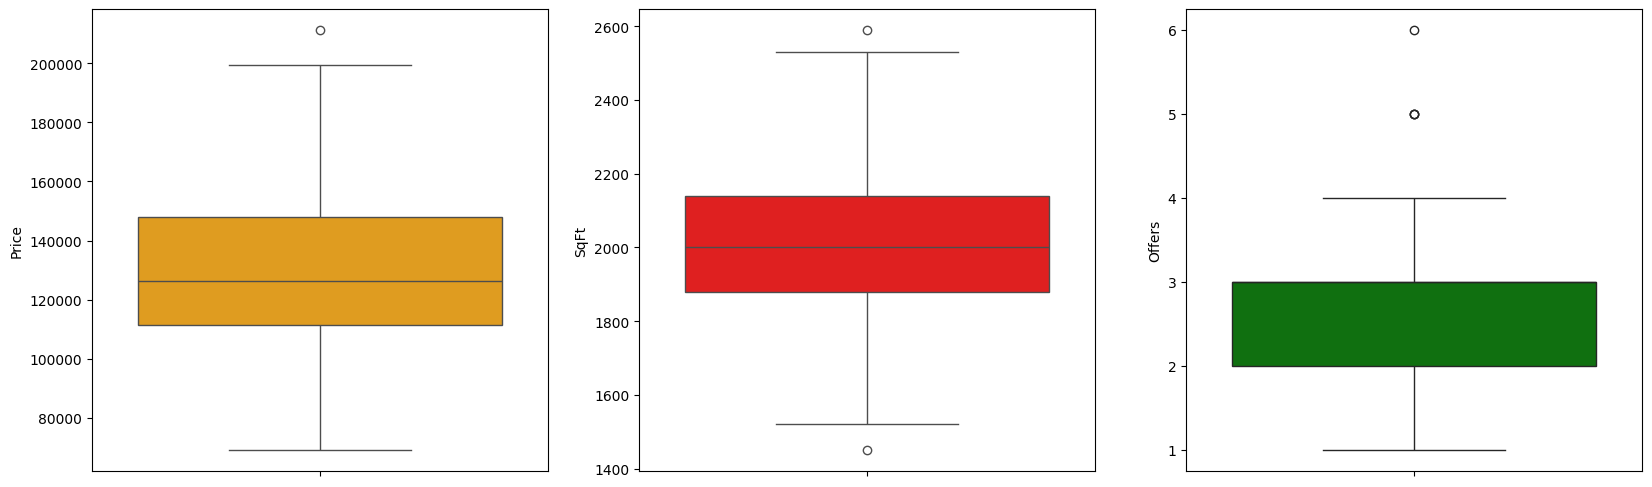

In [19]:
fig, axs = plt.subplots(ncols=3, figsize=(20, 6))


sns.boxplot(data=df['Price'], ax=axs[0], color='orange')
sns.boxplot(data=df['SqFt'], ax=axs[1], color='red')
sns.boxplot(data=df['Offers'], ax=axs[2], color='green')

### Очистка

Данные в том числе могут содержать аномалии, выбросы и ошибки.
 - Поиск аномалий - отдельная обширная задача в МО
 - Для поиска выбросов используют техники визуализации, статистические методы и здравый смысл
 - Отрицательная площадь, цена и количество комнат явно свидетельствуют о наличии ошибок в данных, в таком или подобном случае стоит либо почистить данные, либо воспользоваться какой-то из стратегий работы с пропусками

## Предобработки

Набор данных может содержать данные, которые находятся в совершенно разных диапазонах и масштабах. Так в нашем датасете:

 - цена на квартиру находится от $69100$ у.е. до $211200$ у.е.
 - площадь меняется от $1890 \ ft^2$ до $2590 \ ft^2$
 - количество спален может быть целым числом от $2$ до $5$ 
    
Это приводит к тому, что для некоторых алгоритмов машинного обучения влияние некоторых признаков на выходную переменную будет существенно больше, чем у других. В частности, этой проблеме подвержен алгоритм линейной регрессии ($f_1(x)$) и KNN ($f_2(x)$).

$$f_1(x) = w_1 x_1 + w_2 x_2 + ... + w_n x_n$$
$$f_2(x) = \arg \max_{y \in Y} \sum_i [y_{i;x} = y] w(i, x)$$

Так как влияние признаков на целевую переменную может быть обусловлено не реальной зависимостью, а изменением масштаба, что может привести к выявлению некорректных зависимостей.

### Стандартизация
- преобразование исходного набора в новый c нулевым средним и единичным стандартным отклонением.

$$x_i' = \frac{x_i - \overline{X}}{\sigma_x}$$

Мы будем использоваеть [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) реализацию.

In [20]:
df_num = df[['Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers']]
df_num

,Price,SqFt,Bedrooms,Bathrooms,Offers
Home,,,,,
1,114300.0,1790.0,2.0,2.0,2.0
2,114200.0,2030.0,4.0,2.0,3.0
3,114800.0,1740.0,3.0,2.0,1.0
4,94700.0,1980.0,3.0,2.0,3.0
5,119800.0,2130.0,3.0,3.0,3.0
...,...,...,...,...,...
125,147900.0,2160.0,4.0,3.0,3.0
126,113500.0,2070.0,2.0,2.0,2.0
127,149900.0,2020.0,3.0,3.0,1.0


In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_num)

StandardScaler()

In [22]:
scaler.mean_

array([1.30427341e+05, 2.00093023e+03, 3.02325581e+00, 2.44186047e+00,
       2.57364341e+00])

In [23]:
df_std = scaler.transform(df_num)

In [24]:
df_std = pd.DataFrame(df_std)
df_std

,0,1,2,3,4
0,-0.604934,-1.004784,-1.420587,-0.863042,-0.540045
1,-0.608685,0.138476,1.356015,-0.863042,0.401385
2,-0.586179,-1.242963,-0.032286,-0.863042,-1.481476
3,-1.340127,-0.099703,-0.032286,-0.863042,0.401385
4,-0.398630,0.614835,-0.032286,1.090159,0.401385
...,...,...,...,...,...
124,0.655397,0.757742,1.356015,1.090159,0.401385
125,-0.634942,0.329020,-1.420587,-0.863042,-0.540045
126,0.730416,0.090840,-0.032286,1.090159,-1.481476
127,-0.218583,1.186465,-0.032286,1.090159,1.342815


In [25]:
print(f"mean: {df_std[0].mean()}")
print(f"std: {df_std[0].std()}")

mean: 1.652424966883954e-16
std: 1.0038986502630631


### Нормализация

- преобразование исходного набора в новый с заданным диапазоном.

$$x_i' = a + \frac{x - \min{X}}{\max{X} - \min{X}} \cdot (b - a)$$

Наиболее часто используется приведение к диапазонам $[b, a]$: $[0,1]$ и $[-1,1]$

[docs](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(df_num)

MinMaxScaler()

In [27]:
scaler.data_max_

array([2.112e+05, 2.590e+03, 5.000e+00, 4.000e+00, 6.000e+00])

In [28]:
df_norm = scaler.transform(df_num)
df_norm = pd.DataFrame(df_norm)
df_norm

,0,1,2,3,4
0,0.318086,0.298246,0.000000,0.0,0.2
1,0.317382,0.508772,0.666667,0.0,0.4
2,0.321605,0.254386,0.333333,0.0,0.0
3,0.180155,0.464912,0.333333,0.0,0.4
4,0.356791,0.596491,0.333333,0.5,0.4
...,...,...,...,...,...
124,0.554539,0.622807,0.666667,0.5,0.4
125,0.312456,0.543860,0.000000,0.0,0.2
126,0.568614,0.500000,0.333333,0.5,0.0
127,0.390570,0.701754,0.333333,0.5,0.6


### Категориальные признаки

- Для работы с категориальными признаками надо произвести кодирование признаков - процедуру, которая представляет собой некоторое преобразование категориальных признаков в численное представление по некоторым оговоренным заранее правилам.

In [29]:
df[['Brick', 'Neighborhood']] = \
    df[['Brick', 'Neighborhood']].astype('category')

In [30]:
df[['Brick', 'Neighborhood']]

,Brick,Neighborhood
Home,,
1,No,East
2,No,East
3,No,East
4,No,East
5,No,East
...,...,...
125,Yes,East
126,No,North
127,No,West


Рассмотрим основные категориальные кодировщики.

#### [LabelEncoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

Кодирует категориальную переменную значениями от $0$ до #{уникальных значений признака}.

*согласно документации scikit-learn подобный тип кодирования нужно применять только для целевой переменной.

In [31]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(df['Neighborhood'])

LabelEncoder()

In [32]:
le.transform(df['Neighborhood'])

array([0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 1, 1, 2, 2, 0, 1, 0, 2, 0, 1,
       1, 1, 0, 1, 2, 0, 1, 2, 2, 1, 0, 0, 1, 1, 1, 2, 2, 1, 0, 2, 0, 0,
       2, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 2, 2, 2, 2, 1, 2, 0, 2, 1,
       1, 0, 1, 2, 2, 2, 1, 0, 2, 1, 2, 2, 1, 2, 0, 2, 2, 0, 1, 2, 1, 2,
       1, 1, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 1, 0, 0, 2, 0, 2, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 2, 1, 1, 1, 1, 0, 0, 0, 0, 1, 2, 1, 1])

- East $\rightarrow 0$
- North $\rightarrow 1$
- West $\rightarrow 2$

Также можно восстановить исходное значение переменной:

In [33]:
le.inverse_transform(le.transform(df['Neighborhood']))

array(['East', 'East', 'East', 'East', 'East', 'North', 'West', 'West',
       'East', 'East', 'East', 'East', 'North', 'North', 'West', 'West',
       'East', 'North', 'East', 'West', 'East', 'North', 'North', 'North',
       'East', 'North', 'West', 'East', 'North', 'West', 'West', 'North',
       'East', 'East', 'North', 'North', 'North', 'West', 'West', 'North',
       'East', 'West', 'East', 'East', 'West', 'East', 'North', 'North',
       'East', 'North', 'East', 'North', 'North', 'North', 'North',
       'East', 'East', 'West', 'West', 'West', 'West', 'North', 'West',
       'East', 'West', 'North', 'North', 'East', 'North', 'West', 'West',
       'West', 'North', 'East', 'West', 'North', 'West', 'West', 'North',
       'West', 'East', 'West', 'West', 'East', 'North', 'West', 'North',
       'West', 'North', 'North', 'West', 'East', 'West', 'East', 'West',
       'West', 'East', 'East', 'West', 'West', 'North', 'East', 'East',
       'West', 'East', 'West', 'North', 'East', 'Eas

- **создание избыточных зависимостей - $\text{West} > \text{North} > \text{East}$**

#### [One-Hot Encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

Другой примитивный тип кодирования - для каждого уникального значения переменной создать соответствующий бинарный признак.

In [34]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()

enc.fit(df[['Brick', 'Neighborhood']])

OneHotEncoder()

In [35]:
enc.categories_

[array(['No', 'Yes'], dtype=object),
 array(['East', 'North', 'West'], dtype=object)]

In [36]:
row_data = enc.transform(df[['Brick', 'Neighborhood']]).toarray()

df_one_hot = pd.DataFrame(row_data, columns=[i[j] for i in enc.categories_ for j in range(len(i))])
df_one_hot

,No,Yes,East,North,West
0,1.0,0.0,1.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
124,0.0,1.0,1.0,0.0,0.0
125,1.0,0.0,0.0,1.0,0.0
126,1.0,0.0,0.0,0.0,1.0
127,1.0,0.0,0.0,1.0,0.0


- **Главный недостаток One-Hot Encoder'a заключается в существенном увеличении объема данных, так как большие по количеству уникальных значений признаки кодируются большим количеством бинарных признаков.**

#### [TargetEncoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.TargetEncoder.html)

- вычисляет среднее значение целевой переменной для каждой категории и использует их для преобразования.

In [37]:
data_target_transform = {
    "color": ["red", "black", "red", "blue", "blue", "red", "black"],
    "shape": ["circle", "circle", "circle", "square", "circle", "circle", "square"],
    "target": [0, 2, 1, 1, 1, 0, 2]
}

df_target_transform = pd.DataFrame(data_target_transform)
df_target_transform

,color,shape,target
0,red,circle,0
1,black,circle,2
2,red,circle,1
3,blue,square,1
4,blue,circle,1
5,red,circle,0
6,black,square,2


In [39]:
from sklearn.preprocessing import TargetEncoder

enc_target = TargetEncoder(target_type="multiclass", cv=2)

enc_target.fit(df_target_transform[["color", "shape"]], df_target_transform["target"])

TargetEncoder(cv=2, target_type='multiclass')

In [40]:
df_target_enc = enc_target.transform(df_target_transform[["color", "shape"]])

In [41]:
pd.DataFrame(df_target_enc)

,0,1,2,3,4,5
0,0.565217,0.35545,0.0,0.378238,0.404682,0.211618
1,0.000000,0.00000,1.0,0.378238,0.404682,0.211618
2,0.565217,0.35545,0.0,0.378238,0.404682,0.211618
3,0.000000,1.00000,0.0,0.000000,0.475862,0.418605
4,0.000000,1.00000,0.0,0.378238,0.404682,0.211618
5,0.565217,0.35545,0.0,0.378238,0.404682,0.211618
6,0.000000,0.00000,1.0,0.000000,0.475862,0.418605


## Генерация признаков

Еще одним важным этапом является генерация признаков. Иногда в данных есть переменные, которые имеют физический смысл, и преобразование над ними может добавить нам содержательных признаков, которые улучшат обобщаюшую способность алгоритма. В частности, если в данных есть длина и ширина, то можно посчитать площадь, в нашем случае, имея стоимость дома и площадь в футах, можно посчитать стоимость одного квадратного фута. В подобных ситуациях стоит опираться на вашу фантазию, знания предметной области и кругозор.

Сюда же можно отнести чуть более технические вещи: в рассматриваемом нами наборе данных имеется столбец с датой, которая представлена, как строка, рассмотрим, как преобразовать ее в $3$ новые колонки: день, месяц, год - эти данные будут более содержательными.

In [42]:
df['Date'] = pd.to_datetime(df['Date'])

df

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood,Date
Home,,,,,,,,
1,114300.0,1790.0,2.0,2.0,2.0,No,East,2014-11-16
2,114200.0,2030.0,4.0,2.0,3.0,No,East,2014-07-14
3,114800.0,1740.0,3.0,2.0,1.0,No,East,2014-09-22
4,94700.0,1980.0,3.0,2.0,3.0,No,East,2013-07-12
5,119800.0,2130.0,3.0,3.0,3.0,No,East,2013-12-26
...,...,...,...,...,...,...,...,...
125,147900.0,2160.0,4.0,3.0,3.0,Yes,East,2014-07-09
126,113500.0,2070.0,2.0,2.0,2.0,No,North,2014-01-07
127,149900.0,2020.0,3.0,3.0,1.0,No,West,2013-07-04


In [43]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood,Date,year,month,day
Home,,,,,,,,,,,
1,114300.0,1790.0,2.0,2.0,2.0,No,East,2014-11-16,2014,11,16
2,114200.0,2030.0,4.0,2.0,3.0,No,East,2014-07-14,2014,7,14
3,114800.0,1740.0,3.0,2.0,1.0,No,East,2014-09-22,2014,9,22
4,94700.0,1980.0,3.0,2.0,3.0,No,East,2013-07-12,2013,7,12
5,119800.0,2130.0,3.0,3.0,3.0,No,East,2013-12-26,2013,12,26
...,...,...,...,...,...,...,...,...,...,...,...
125,147900.0,2160.0,4.0,3.0,3.0,Yes,East,2014-07-09,2014,7,9
126,113500.0,2070.0,2.0,2.0,2.0,No,North,2014-01-07,2014,1,7
127,149900.0,2020.0,3.0,3.0,1.0,No,West,2013-07-04,2013,7,4


## [Разбиение данных](https://education.yandex.ru/handbook/ml/article/kross-validaciya)

### Общая схема разбиения данных: Train/Val/Test

- Обучающая выборка - Training set
  - обучение модели(настойка ее параметров)
- Валидационная выборка - Validation set
  - выбор пайплайна(модели/гиперпараметров/признаков)
  - иногда: локальный контроль
- Тестовая выборка - Test set
  - оценка качества алгоритма
  - иногда: итоговая оценка алгоритма

<img src="src/data_split.png" width="650px">

Для обучения и выбора модели есть много вариантов разбиения:

### [Кросс-Валидация](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html)

<img src="src/CV.png" width="650px">

#### [Больше разбиений](https://scikit-learn.org/stable/api/sklearn.model_selection.html)

В данном случае мы рассмотрим простейший случай: [train/test split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(df.drop(columns=['Price']), df['Price'], shuffle=True, test_size=0.2, random_state=42)

## Задача

Вам необходимо предобработать данные, обучить модель [линейной регрессии](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) и получить лучшее значение метрики [MAPE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_percentage_error.html).

$$MAPE = \frac{1}{n} \sum_i^n \left \lvert \frac{y_i - \hat{y_i}}{y_i} \right \rvert$$

In [56]:
# предобработка данных
#############################
### ╰( ͡° ͜ʖ ͡° )つ──────☆*:・ﾟ
#############################

In [58]:
# обучение модели
#############################
### ╰( ͡° ͜ʖ ͡° )つ──────☆*:・ﾟ
#############################

from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [ ]:
# предобработка X_valid

#############################
### ╰( ͡° ͜ʖ ͡° )つ──────☆*:・ﾟ
#############################

In [ ]:
y_pred = reg.predict(X_valid)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(y_valid, y_pred)